<a href="https://colab.research.google.com/github/lionheart7dec/playing_with_mnist/blob/master/CNN_on_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

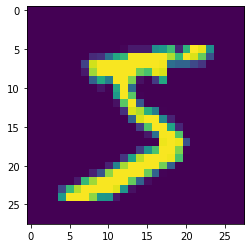

In [6]:
plt.imshow(x_train[0])

In [0]:
from tensorflow.keras.utils import to_categorical

In [8]:
y_train.shape

(60000,)

In [0]:
y_example = to_categorical(y_train)

In [10]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [11]:
y_example.shape

(60000, 10)

In [0]:
y_cat_test = to_categorical(y_test, num_classes = 10)

In [0]:
y_cat_train = to_categorical(y_train, 10)

In [14]:
x_train[0].max()

255

In [15]:
x_train[0].min()

0

In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
scaled_image = x_train[0]

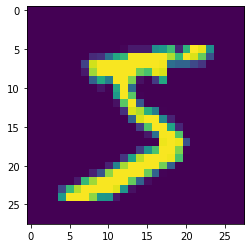

In [18]:
plt.imshow(scaled_image) 

In [0]:
#batch_size, width, height, color_channels
x_train = x_train.reshape(60000,28,28,1)

In [0]:
x_test = x_test.reshape(10000, 28, 28,1)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, MaxPool2D

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(4,4), input_shape = (28, 28,1), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))


#Output layer
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor= 'val_loss', patience=1)

In [29]:
model.fit(x_train, y_cat_train, epochs=20, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1415 - accuracy: 0.9584 - val_loss: 0.0539 - val_accuracy: 0.9816
Epoch 2/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0469 - accuracy: 0.9857 - val_loss: 0.0476 - val_accuracy: 0.9842
Epoch 3/20
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0298 - accuracy: 0.9906 - val_loss: 0.0395 - val_accuracy: 0.9869
Epoch 4/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0198 - accuracy: 0.9936 - val_loss: 0.0412 - val_accuracy: 0.9871


In [0]:
metrics = pd.DataFrame(model.history.history)

In [31]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.141472,0.958400,0.053919,0.9816
1,0.046898,0.985717,0.047637,0.9842
2,0.029827,0.990650,0.039497,0.9869
3,0.019789,0.993633,0.041193,0.9871


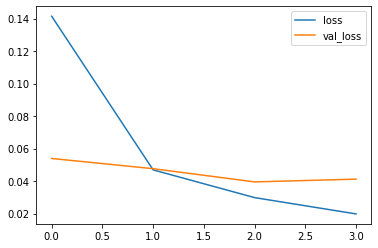

In [32]:
metrics[['loss', 'val_loss']].plot()

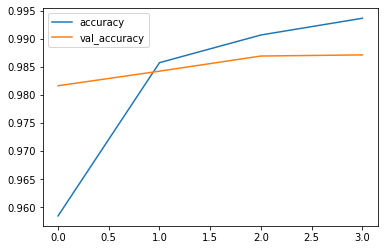

In [33]:
metrics[['accuracy','val_accuracy']].plot()

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
predicitions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [37]:
print(classification_report(y_test, predicitions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.97      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [38]:
confusion_matrix(y_test, predicitions)

array([[ 975,    0,    2,    1,    0,    0,    1,    0,    1,    0],
       [   0, 1130,    1,    2,    0,    0,    2,    0,    0,    0],
       [   2,    1, 1026,    1,    1,    0,    1,    0,    0,    0],
       [   0,    0,    2, 1003,    0,    3,    0,    0,    2,    0],
       [   0,    0,    0,    0,  968,    0,    4,    0,    1,    9],
       [   1,    0,    1,    7,    0,  878,    4,    0,    1,    0],
       [   4,    2,    0,    0,    5,    1,  944,    0,    2,    0],
       [   1,    5,   16,    3,    0,    0,    0,  996,    2,    5],
       [   6,    0,    5,    1,    0,    0,    0,    1,  957,    4],
       [   5,    3,    0,    0,    4,    1,    0,    0,    2,  994]])

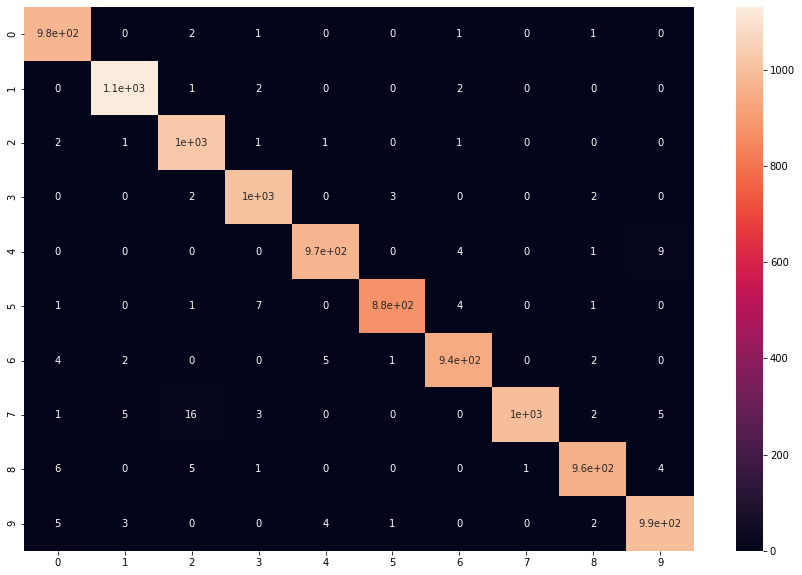

In [39]:
plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_test, predicitions), annot = True)

In [0]:
my_number = x_test[0]

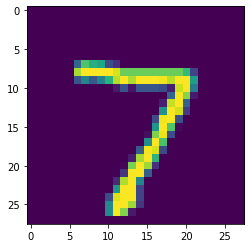

In [41]:
plt.imshow(my_number.reshape(28,28))

In [42]:
#num_images, width, height, color_channels
model.predict_classes(my_number.reshape(1,28,28,1))

array([7])